In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

df = pd.read_excel(r"C:\Users\ljwil\Desktop\Intro STATS\Project Stats 2\Chapter 13\Practice Portfolio 13 Data-3.xlsx",sheet_name="Regression")

In [76]:
anova_regression= {
    "df":[],	
    "SS":[],
        "MS":[],	
        "F":[],	
        "Significance F":[]

}
df_subcolums = df[['Number of M&Ms in a bag, x_i', 'Number of Blues, y_i']]
x_axis = df['Number of M&Ms in a bag, x_i']
y_aix = df[ 'Number of Blues, y_i']

X = sm.add_constant(df['Number of M&Ms in a bag, x_i'])
model = sm.OLS(df['Number of Blues, y_i'], X).fit()

conf_intervals = model.conf_int()

In [77]:
# Created a custom summary with 95% confidence intervals
custom_summary = pd.DataFrame({
    'Coefficient': model.params,
    'Lower 95.0%': conf_intervals[0],
    'Upper 95.0%': conf_intervals[1]
})

In [78]:
summary = model.summary()
# Extract both R and R^2
multiple_r = model.rsquared ** 0.5
multiple_r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
residuals = model.resid
rse = np.sqrt(np.sum(residuals**2) / (len(df) - 2))  #residual standard error (RSE)
num_observations = model.nobs   #number of observations


In [79]:
# Extract both R and R^2
multiple_r = model.rsquared ** 0.5
multiple_r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
residuals = model.resid
rse = np.sqrt(np.sum(residuals**2) / (len(df) - 2))  #residual standard error (RSE)
num_observations = model.nobs   #number of observations

Regression_Summary = {
    "Multiple R":[multiple_r],
"R Square":[multiple_r_squared],
"Adjusted R Square":[adjusted_r_squared],
"Standard Error":[rse],
"Number of Observations":[num_observations]
}
Regression_Summary_df = pd.DataFrame(Regression_Summary).transpose()
label_regression =  ["Regression Summary Table"]
Regression_Summary_df.columns = label_regression
print("Regression Stastisic Summary")
print(Regression_Summary_df)

Regression Stastisic Summary
                        Regression Summary Table
Multiple R                              0.285192
R Square                                0.081334
Adjusted R Square                       0.068750
Standard Error                          1.945181
Number of Observations                 75.000000


In [80]:
#Regression section
y_mean = df['Number of Blues, y_i'].mean()
predicted_values = model.predict(X)
ssr = np.sum((predicted_values - y_mean)**2)
df_regression = len(model.params) - 1
msr = ssr / df_regression
f_statistic = model.fvalue
f_signficant = model.f_pvalue
anova_regression['df'].append(df_regression)
anova_regression['SS'].append(ssr)
anova_regression['MS'].append(msr)
anova_regression['F'].append(f_statistic)
anova_regression['Significance F'].append(f_signficant)
#Resduual section
sse = np.sum(residuals**2)
mse = sse / (len(df) - len(model.params))
df_residual = len(df) - len(model.params)
anova_regression['df'].append(df_residual)
anova_regression['SS'].append(sse)
anova_regression['MS'].append(mse)
anova_regression['F'].append(np.nan)
anova_regression['Significance F'].append(np.nan)


#Total sectiion
total_obs = df_regression+df_residual
sst = np.sum((df['Number of Blues, y_i'] - y_mean)**2)
anova_regression['df'].append(total_obs)
anova_regression['SS'].append(sst)
anova_regression['MS'].append(np.nan)
anova_regression['F'].append(np.nan)
anova_regression['Significance F'].append(np.nan)
label_anova = ["Regression","Residual","Total"]
anova_regression_df = pd.DataFrame(anova_regression,index=label_anova)
print("Anova Summary")
print(anova_regression_df)

Anova Summary
            df          SS         MS         F  Significance F
Regression   1   24.454522  24.454522  6.463076        0.013135
Residual    73  276.212145   3.783728       NaN             NaN
Total       74  300.666667        NaN       NaN             NaN


In [81]:
intercept_table = model.summary2().tables[1]

intercept_table_df =pd.DataFrame(intercept_table)
coef_table = model.summary2().tables[1]

ci_table = model.conf_int().loc['const'].to_frame().rename_axis('95% Confidence Interval', axis=1)

coef_table = model.conf_int(alpha=0.05)
# Add the coefficient values to the table
coef_table['Coefficient'] = model.params

#intercept_table['Lower 95.0%'] = [ci_table.iloc[0][0],coef_table.iloc[1][0]]
#intercept_table['Upper 95.0%'] = [ci_table.iloc[1][0],coef_table.iloc[1][1]]
# keep these for reference 
intercept_table['Upper 95.0%'] = [ci_table.iloc[1].iloc[0], coef_table.iloc[1].iloc[1]]
intercept_table['Lower 95.0%'] = [ci_table.iloc[0].iloc[0], coef_table.iloc[1].iloc[0]]
intercept_table.columns = ["Coefficient","Standard Error",	"t Stat",	"P-value",	"Lower 95%",	"Upper 95%",	"Lower 95.0%",	"Upper 95.0%"]
intercept_table.index = ["Intercept","Number of M&Ms in a bag, x_i"]
print("Table of Coefficient")
print(intercept_table)

Table of Coefficient
                              Coefficient  Standard Error    t Stat   P-value  \
Intercept                        6.562461        1.393298  4.710019  0.000012   
Number of M&Ms in a bag, x_i    -0.240536        0.094615 -2.542258  0.013135   

                              Lower 95%  Upper 95%  Lower 95.0%  Upper 95.0%  
Intercept                      3.785622   9.339299     9.339299     3.785622  
Number of M&Ms in a bag, x_i  -0.429104  -0.051968    -0.051968    -0.429104  


C:\Users\ljwil\AppData\Local\Temp\ipykernel_1788\2594100936.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  equation = f'Y = {model.params[0]:.2f} + {model.params[1]:.4f}X\nR-squared = {multiple_r_squared:.4f}'


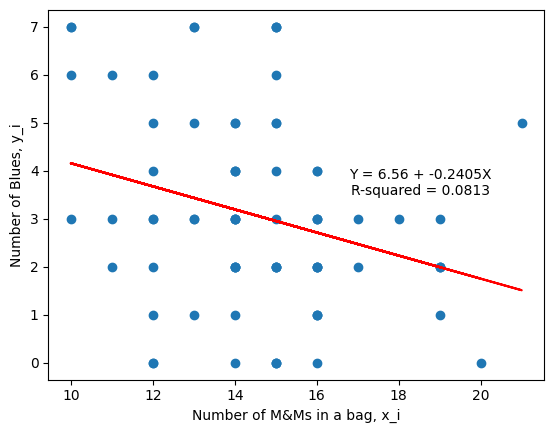

In [82]:
#Making Scatter plot with regression line
plt.scatter(x_axis, y_aix, label='Data Points')

# Plot the regression line
plt.plot(x_axis, model.predict(X), color='red', label='Regression Line')
equation = f'Y = {model.params[0]:.2f} + {model.params[1]:.4f}X\nR-squared = {multiple_r_squared:.4f}'
plt.annotate(equation, xy=(0.75, .5), xycoords='axes fraction', ha='center', fontsize=10)

# Set labels and title
plt.xlabel('Number of M&Ms in a bag, x_i')
plt.ylabel( 'Number of Blues, y_i')
plt.show()

In [ ]:
#From the scatter plot there seems to be a negative relationship between the Number of MnMs and Number of Blue MnMs
#From this I think that the more MnMs are in a bag the less Blue Mnms would be present